In [1]:
import os

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from tqdm.notebook import tqdm

In [5]:
root_path = '/shared/rsaas/nschiou2/CXR/CheXpert-v1.0-small/'

demo_fname = '/shared/rsaas/nschiou2/CXR/CheXpert_demographics.csv'

# Get patient information

In [ ]:
meta_df = pd.read_csv(os.path.join(root_path, 'train.csv'))

Extract patient ID from path

In [272]:
meta_df.loc[:, 'Patient ID'] = meta_df['Path'].apply(lambda x: x.split('/')[2])
meta_df.count()

Path                          222561
Sex                           222561
Age                           222561
Frontal/Lateral               222561
AP/PA                         190299
No Finding                     22287
Enlarged Cardiomediastinum     44763
Cardiomegaly                   46030
Lung Opacity                  117472
Lung Lesion                    11919
Edema                          85668
Consolidation                  70405
Pneumonia                      27500
Atelectasis                    68094
Pneumothorax                   78632
Pleural Effusion              132788
Pleural Other                   6471
Fracture                       12161
Support Devices               122910
Patient ID                    222561
Primary Race                  165795
Ethnicity                     189456
dtype: int64

## Preliminary investigation of attributes

In [273]:
meta_df.groupby('Sex').count()[['Age', 'No Finding', 'Cardiomegaly']]

,Age,No Finding,Cardiomegaly
Sex,,,
Female,90470,9242,18420
Male,132090,13044,27610
Unknown,1,1,0


Remove patients with 0 age (there are only 2 we are concerned about)

In [274]:
meta_df = meta_df[meta_df['Age'] > 0]
meta_df = meta_df[meta_df['Sex'] != 'Unknown']
meta_df.groupby('Sex').count()[['Age', 'No Finding', 'Cardiomegaly']]

,Age,No Finding,Cardiomegaly
Sex,,,
Female,90470,9242,18420
Male,132090,13044,27610


In [276]:
meta_df.groupby('Ethnicity').count()[['Age', 'Sex', 'No Finding', 'Cardiomegaly']]

,Age,Sex,No Finding,Cardiomegaly
Ethnicity,,,,
Hispanic/Latino,26116,26116,3517,5489
Non-Hispanic/Non-Latino,162875,162875,16075,34977
Unknown,465,465,81,81


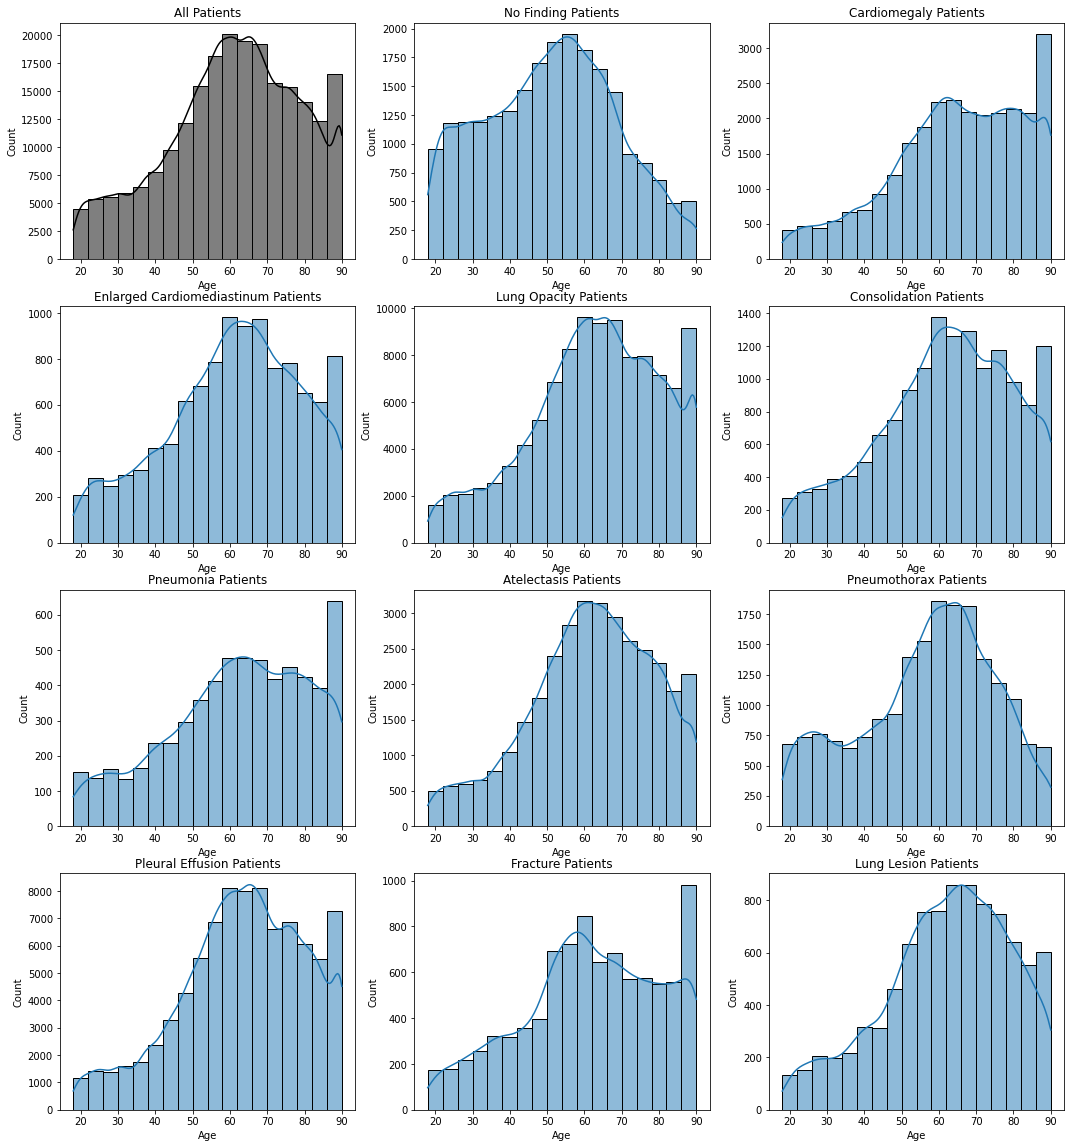

In [125]:
fig, ax = plt.subplots(4, 3, figsize=(18, 20))

sns.histplot(data=meta_df, x='Age', binwidth=4, kde=True, color='k', ax=ax[0, 0])
ax[0, 0].set_title('All Patients')

sns.histplot(data=meta_df[meta_df['No Finding'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[0, 1])
ax[0, 1].set_title('No Finding Patients')

sns.histplot(data=meta_df[meta_df['Cardiomegaly'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[0, 2])
ax[0, 2].set_title('Cardiomegaly Patients')

sns.histplot(data=meta_df[meta_df['Enlarged Cardiomediastinum'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[1, 0])
ax[1, 0].set_title('Enlarged Cardiomediastinum Patients')

sns.histplot(data=meta_df[meta_df['Lung Opacity'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[1, 1])
ax[1, 1].set_title('Lung Opacity Patients')

sns.histplot(data=meta_df[meta_df['Consolidation'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[1, 2])
ax[1, 2].set_title('Consolidation Patients')

sns.histplot(data=meta_df[meta_df['Pneumonia'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[2, 0])
ax[2, 0].set_title('Pneumonia Patients')

sns.histplot(data=meta_df[meta_df['Atelectasis'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[2, 1])
ax[2, 1].set_title('Atelectasis Patients')

sns.histplot(data=meta_df[meta_df['Pneumothorax'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[2, 2])
ax[2, 2].set_title('Pneumothorax Patients')

sns.histplot(data=meta_df[meta_df['Pleural Effusion'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[3, 0])
ax[3, 0].set_title('Pleural Effusion Patients')

sns.histplot(data=meta_df[meta_df['Fracture'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[3, 1])
ax[3, 1].set_title('Fracture Patients')

sns.histplot(data=meta_df[meta_df['Lung Lesion'] == 1], x='Age', binwidth=4, kde=True, palette='Set2', ax=ax[3, 2])
ax[3, 2].set_title('Lung Lesion Patients');

In [279]:
melt_df = pd.melt(meta_df, id_vars=['Age', 'Sex', 'Ethnicity', 'Patient ID', 'Frontal/Lateral', 'AP/PA'],
                  value_vars=['No Finding', 'Cardiomegaly', 'Enlarged Cardiomediastinum', 'Lung Opacity', 'Consolidation',
                              'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Fracture', 'Lung Lesion'],
                  var_name='Diagnosis')

melt_df = melt_df[melt_df['value'] == 1]

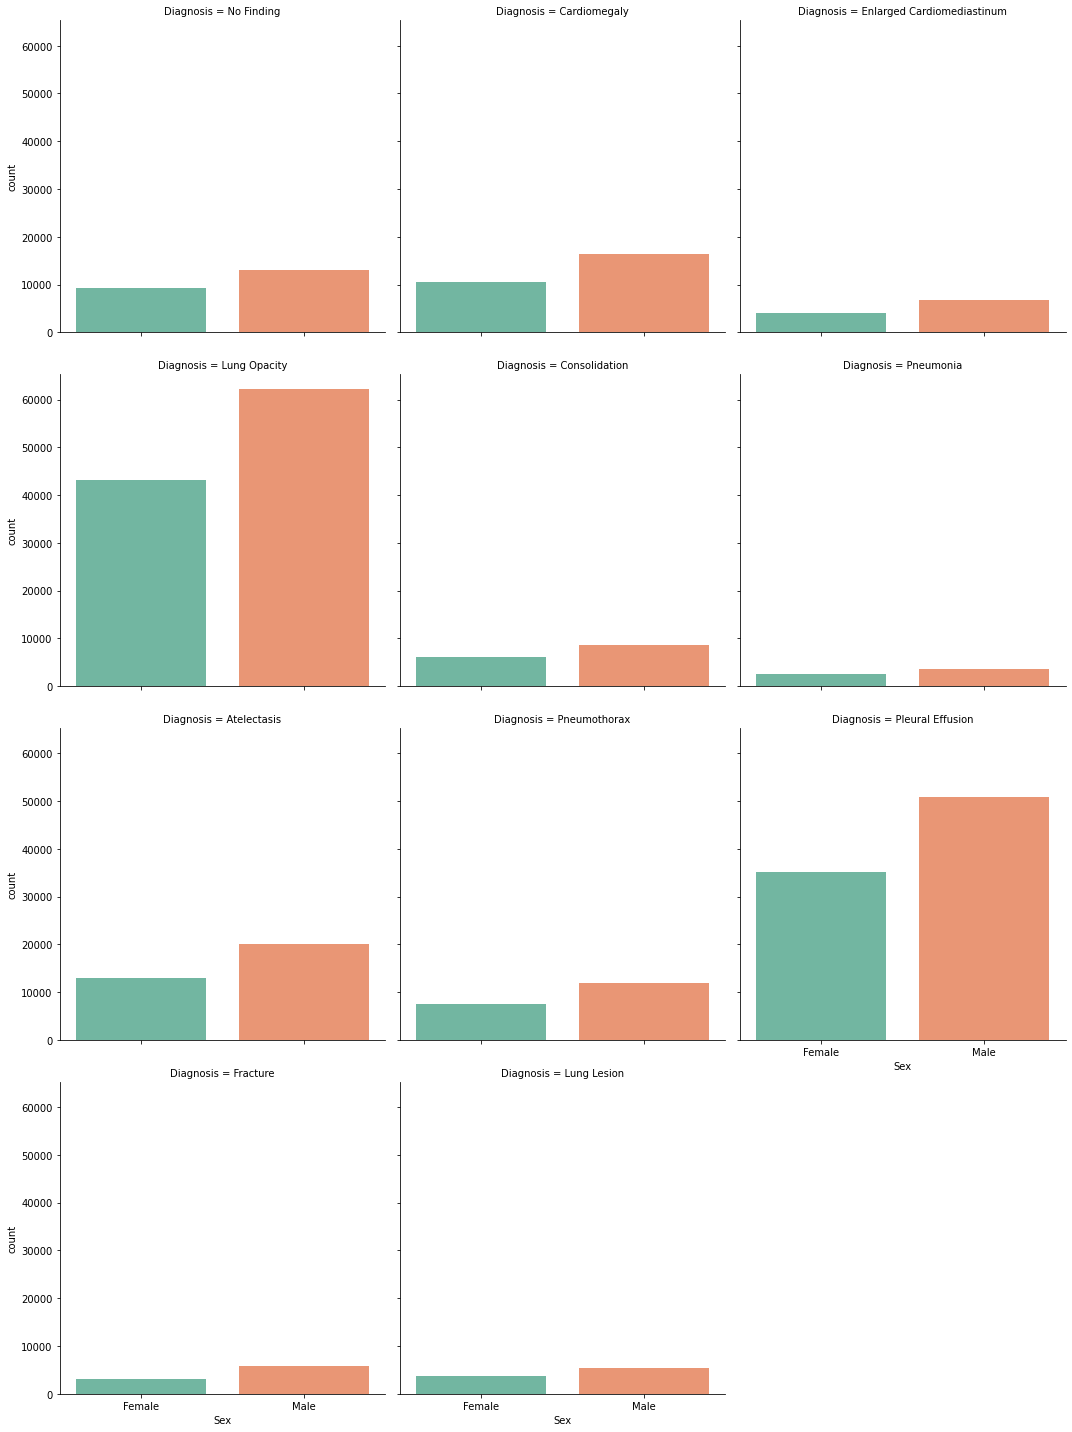

In [293]:
g = sns.catplot(data=melt_df, x='Sex', y=None, hue='Sex', col='Diagnosis', kind='count', dodge=False, palette='Set2', col_wrap=3)

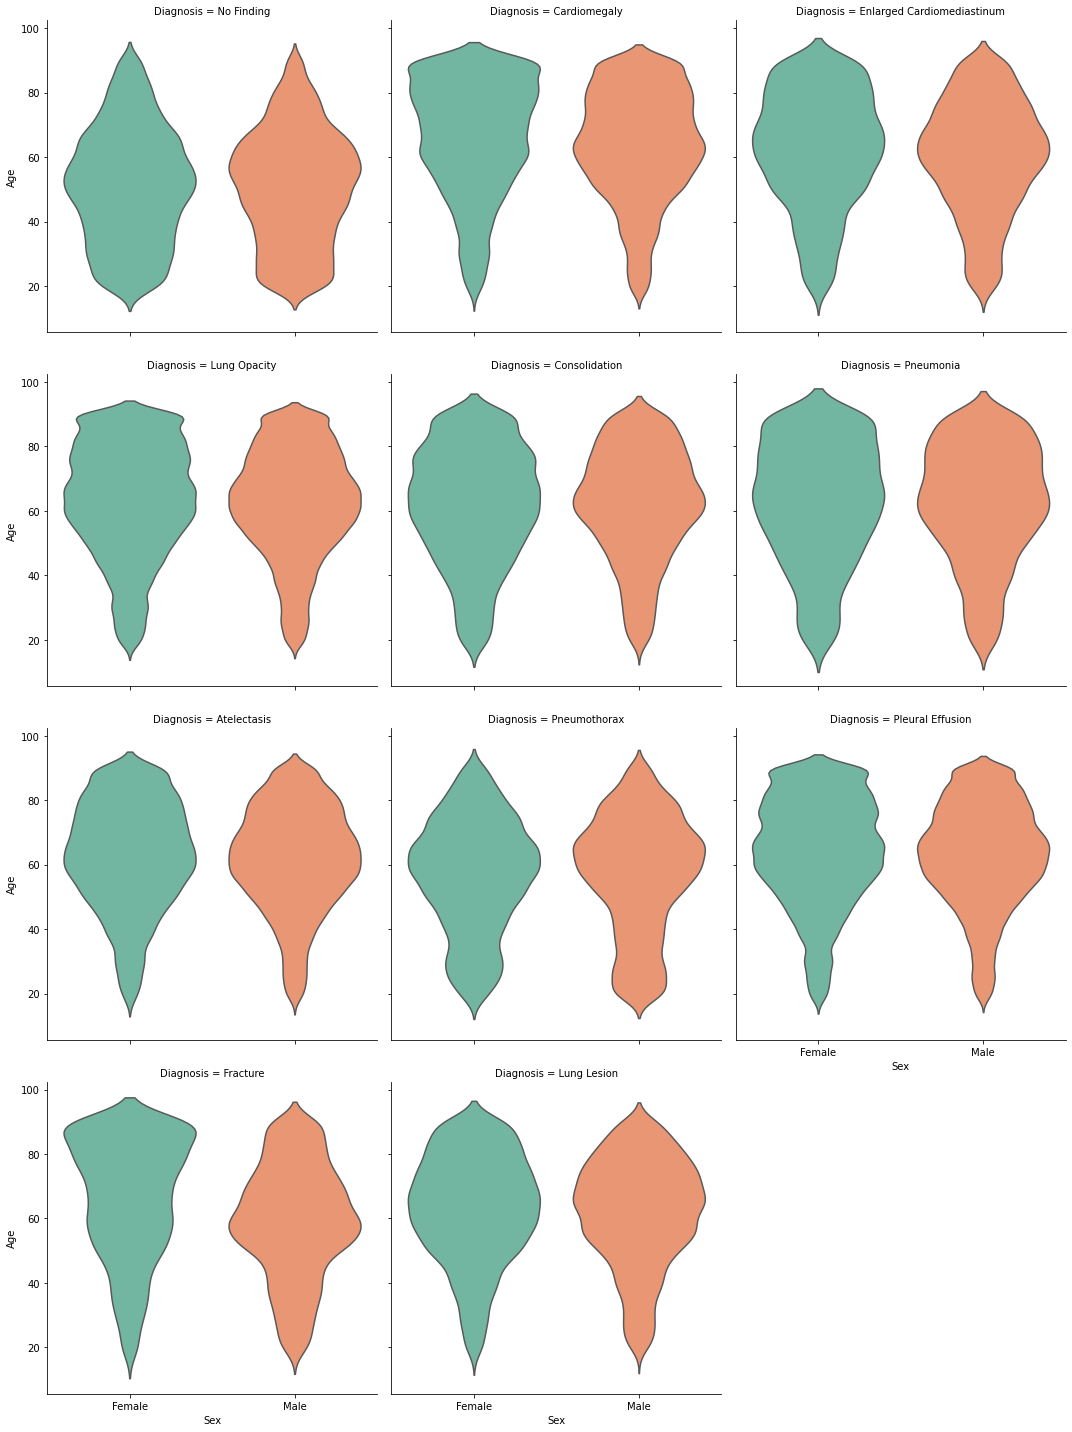

In [289]:
g = sns.catplot(data=melt_df, x='Sex', y='Age', hue='Sex', col='Diagnosis', kind='violin', inner=None, dodge=False, palette='Set2', col_wrap=3)

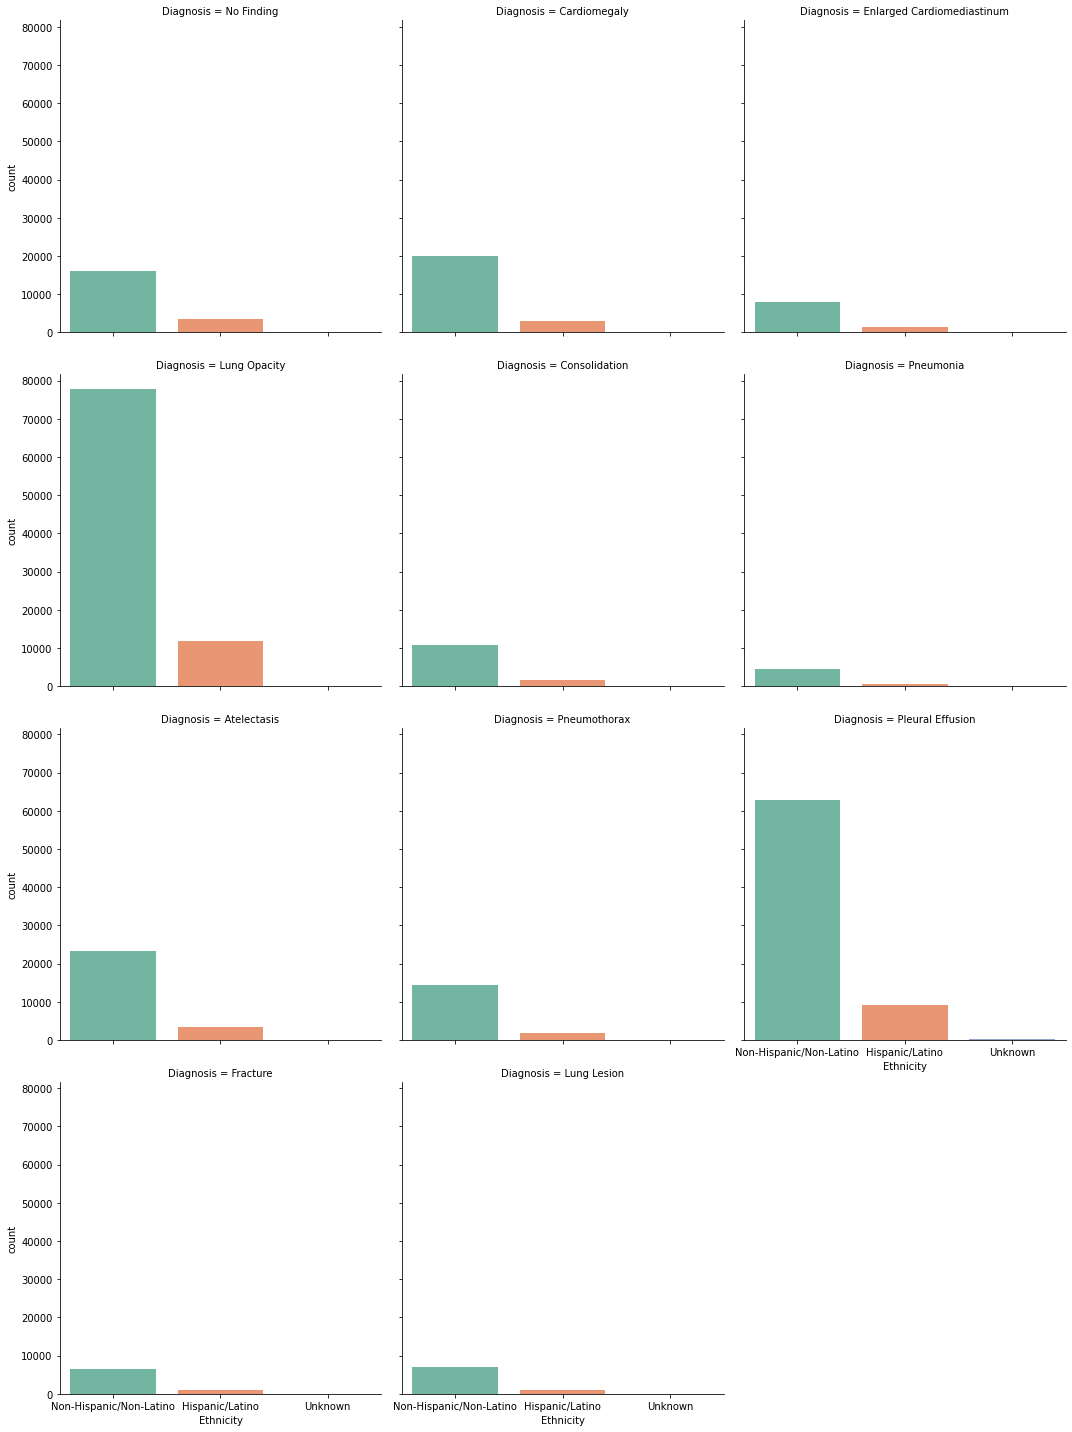

In [294]:
g = sns.catplot(data=melt_df, x='Ethnicity', y=None, hue='Ethnicity', col='Diagnosis', kind='count', dodge=False, palette='Set2', col_wrap=3)

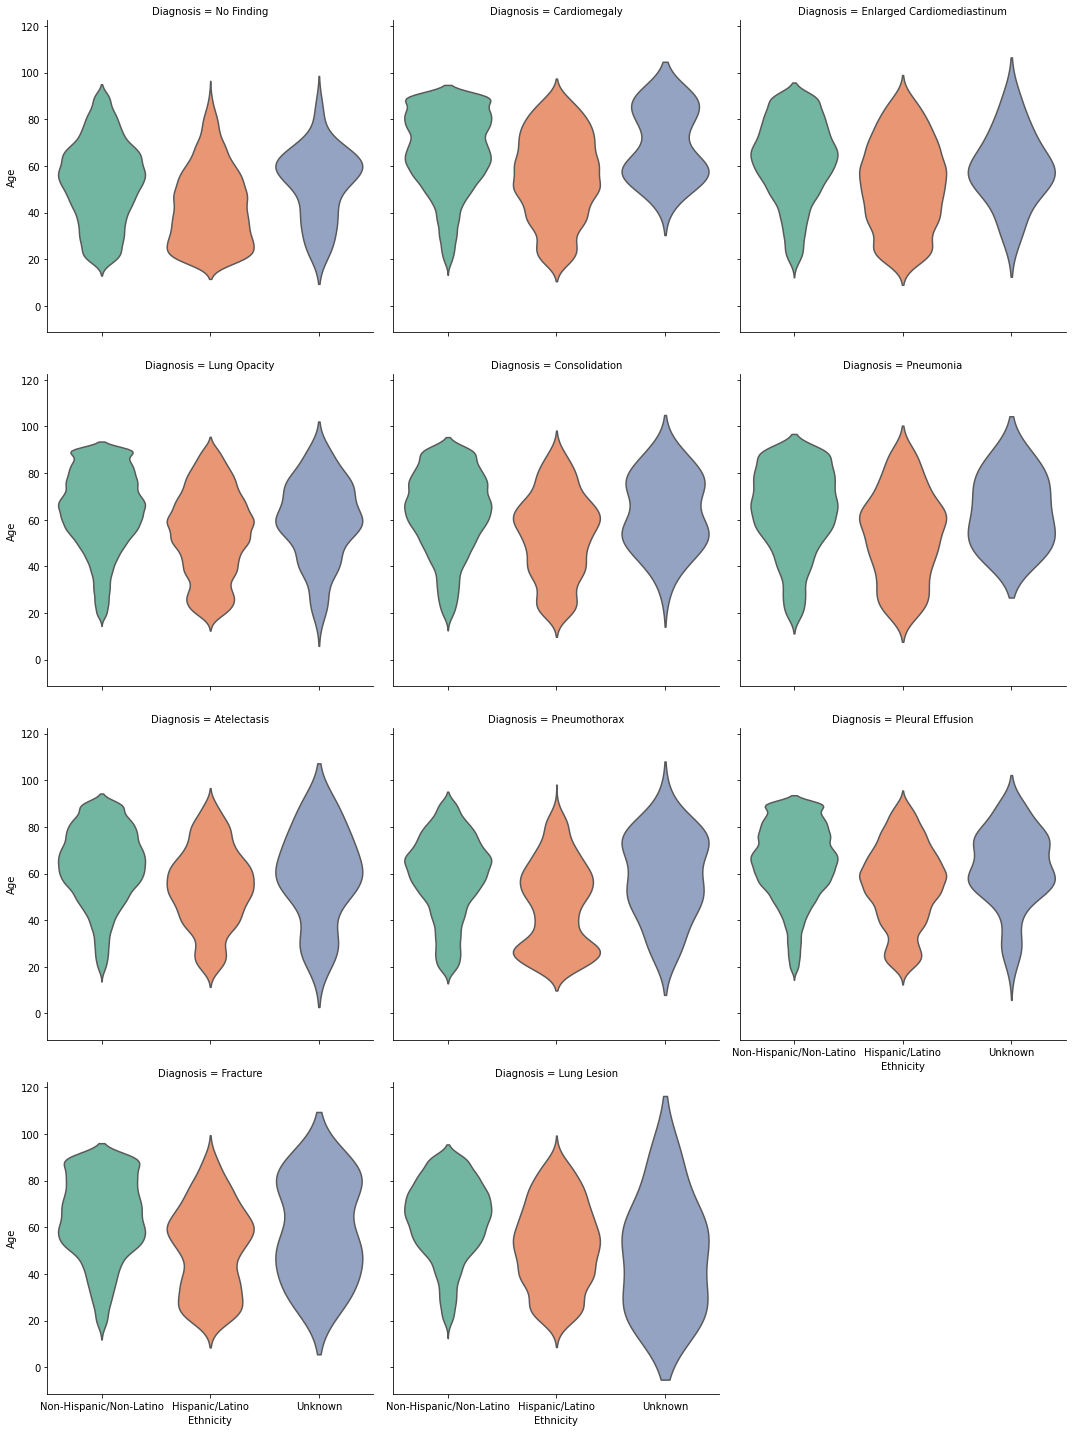

In [287]:
g = sns.catplot(data=melt_df, x='Ethnicity', y='Age', hue='Ethnicity', col='Diagnosis', kind='violin', inner=None, dodge=False, palette='Set2', col_wrap=3)

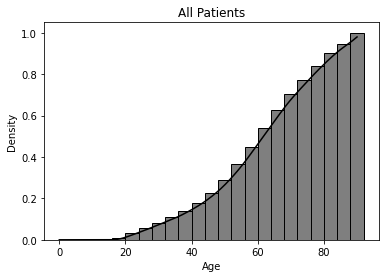

In [110]:
g = sns.histplot(data=meta_df, x='Age', binwidth=4, stat='density', cumulative=True, kde=True, color='k')
g.set_title('All Patients');

It seems that an age of 60 might be a suitable cutoff.

# Save race/ethnicity-related demographics

In [254]:
demo_df = pd.read_csv(demo_fname)
demo_df.count()

PATIENT         65401
GENDER          65401
AGE_AT_CXR      65401
PRIMARY_RACE    64860
ETHNICITY       65317
dtype: int64

## Pre-process ethnicity

In [255]:
demo_df['ETHNICITY'].unique()

array(['Non-Hispanic/Non-Latino', 'Hispanic/Latino', 'Unknown', nan,
       'Patient Refused', 'Hispanic', 'Not Hispanic'], dtype=object)

In [256]:
demo_df.groupby('ETHNICITY').count()

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE
ETHNICITY,,,,
Hispanic,1,1,1,1
Hispanic/Latino,7926,7926,7926,7922
Non-Hispanic/Non-Latino,47908,47908,47908,47889
Not Hispanic,3,3,3,3
Patient Refused,174,174,174,174
Unknown,9305,9305,9305,8866


In [257]:
ethnicity_map = {'Non-Hispanic/Non-Latino': 'Non-Hispanic/Non-Latino',
                 'Not Hispanic': 'Non-Hispanic/Non-Latino',
                 'Hispanic/Latino': 'Hispanic/Latino',
                 'Hispanic': 'Hispanic/Latino',
                 'Patient Refused': 'Unknown'}
demo_df['ethnicity'] = demo_df['ETHNICITY'].map(ethnicity_map)

In [258]:
demo_df['ethnicity'].unique()

array(['Non-Hispanic/Non-Latino', 'Hispanic/Latino', nan, 'Unknown'],
      dtype=object)

In [259]:
demo_df.groupby('ethnicity').count()

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
ethnicity,,,,,
Hispanic/Latino,7927,7927,7927,7923,7927
Non-Hispanic/Non-Latino,47911,47911,47911,47892,47911
Unknown,174,174,174,174,174


## Pre-process race

In [260]:
demo_df.groupby('PRIMARY_RACE').count()

,PATIENT,GENDER,AGE_AT_CXR,ETHNICITY,ethnicity
PRIMARY_RACE,,,,,
American Indian or Alaska Native,147,147,147,147,146
Asian,6235,6235,6235,6235,6201
Asian - Historical Conv,1,1,1,1,1
"Asian, Hispanic",8,8,8,8,7
"Asian, non-Hispanic",817,817,817,817,597
Black or African American,2613,2613,2613,2613,2607
"Black, Hispanic",17,17,17,17,11
"Black, non-Hispanic",517,517,517,517,414
"Native American, Hispanic",13,13,13,13,12


In [261]:
demo_df['PRIMARY_RACE'].unique()

array(['White', 'Other', 'Unknown', 'White, non-Hispanic', 'Asian', nan,
       'Black or African American', 'Black, non-Hispanic',
       'Other, Hispanic', 'Race and Ethnicity Unknown',
       'Asian, non-Hispanic', 'Pacific Islander, non-Hispanic',
       'Native Hawaiian or Other Pacific Islander', 'Other, non-Hispanic',
       'Patient Refused', 'White, Hispanic', 'Black, Hispanic',
       'Asian, Hispanic', 'American Indian or Alaska Native',
       'Native American, Hispanic', 'Native American, non-Hispanic',
       'Pacific Islander, Hispanic', 'Asian - Historical Conv',
       'White or Caucasian'], dtype=object)

In [262]:
race_map = {'Unknown': np.nan, 'Race and Ethnicity Unknown': np.nan, 'Patient Refused': np.nan,
            'White': 'White',
            'White, non-Hispanic': 'White',
            'White, Hispanic': 'White',
            'White or Caucasian': 'White',
            'Black or African American': 'Black or African American',
            'Black, non-Hispanic': 'Black or African American',
            'Black, Hispanic': 'Black or African American',
            'Asian': 'Asian',
            'Asian, non-Hispanic': 'Asian',
            'Asian, Hispanic': 'Asian',
            'Asian - Historical Conv': 'Asian',
            'Native Hawaiian or Pacific Islander': 'Native Hawaiian or Pacific Islander',
            'Pacific Islander, non-Hispanic': 'Native Hawaiian or Pacific Islander',
            'Pacific Islander, Hispanic': 'Native Hawaiian or Pacific Islander',
            'Native American, Hispanic': 'Native American',
            'Native American, non-Hispanic': 'Native American',
            'American Indian or Alaska Native': 'Native American',
            'Other, Hispanic': 'Hispanic',            
            'Other, non-Hispanic': 'Other',
            }

demo_df['race'] = demo_df['PRIMARY_RACE'].map(race_map)

In [263]:
demo_df['race'].unique()

array(['White', nan, 'Asian', 'Black or African American', 'Hispanic',
       'Native Hawaiian or Pacific Islander', 'Other', 'Native American'],
      dtype=object)

## Make index-able by patient ID

In [264]:
demo_df = demo_df.set_index('PATIENT')

## Add race and ethnicity demographics to overall metadata

In [265]:
remove_patients = set()

for i in tqdm(meta_df.index):
    try:
        meta_df.loc[i, 'Primary Race'] = demo_df.loc[meta_df.loc[i, 'Patient ID'], 'race']
        meta_df.loc[i, 'Ethnicity'] = demo_df.loc[meta_df.loc[i, 'Patient ID'], 'ethnicity']
    except KeyError:
        remove_patients.add(meta_df.loc[i, 'Patient ID'])

  0%|          | 0/223414 [00:00<?, ?it/s]

In [266]:
meta_df.to_csv(os.path.join(root_path, 'train_demo.csv'), index=False)

In [267]:
meta_df = meta_df[~meta_df['Patient ID'].isin(list(remove_patients))]

In [268]:
meta_df.to_csv(os.path.join(root_path, 'train_demo_filt_patients.csv'), index=False)

# Engineered dataset sampling

In [64]:
def engineered_sampling(subset: str, flip: bool = False, verbose: bool = False):

    meta_df = pd.read_csv(os.path.join(root_path, 'train_demo_filt_patients.csv'), dtype={'Patient ID': str, 'Primary Race': object, 'Ethnicity': object})
    N = 10000 if subset == 'train' else 4000
    result = pd.DataFrame()
    orig_subpop_results = dict()
    selected_subpop_results = dict()
    n_total = 0
    
    conditions = ['Cardiomegaly', 'No Finding']
    sexes = ['Male', 'Female']
    ethnicities = ['Hispanic/Latino', 'Non-Hispanic/Non-Latino']
    
    combos = list(itertools.product(*[conditions, sexes, ethnicities]))
    num_combos = len(combos)
    
    for combo_iter, combo in enumerate(combos):
        condition, sex, ethnicity = combo
        force = True if ((combo_iter + 1) * 2 == num_combos) or (combo_iter + 1 == num_combos) else False

        # Isolate samples to choose from
        condition_df = meta_df[(meta_df[condition] == 1) &
                       (meta_df['Sex'].isin(['Male', 'Female'])) &
                       (meta_df['Ethnicity'].isin(['Hispanic/Latino', 'Non-Hispanic/Non-Latino']))]
        df = meta_df[(meta_df[condition] == 1) &
                     (meta_df['Sex'] == sex) & 
                     (meta_df['Ethnicity'] == ethnicity)]
        orig_subpop_reslts[combo] = df
    
        # Identify number of samples to take
        n = int(df.shape[0] * N / condition_df.shape[0])
        if force:
            n = N - n_total
        if verbose:
            print(f'Need to sample {n} examples from {combo}')
        n_total += n
        if force:
            assert n_total == N
            n_total = 0
        
        # Sample from a skewed distribution
        np.random.seed(8)
        binwidth = 5
        alpha = 2
        beta = 5
        s = np.random.beta(alpha, beta, n)
        if flip:
            s = 1 - s
        
        # Bin ages
        min_age = min(condition_df.Age.unique())
        max_age = max(condition_df.Age.unique())
        age = s * (max_age - min_age) + min_age
        bins = ((age - min_age) // binwidth).astype(int)
        bincount = np.bincount(bins)
        
        # Sample from sub-population
        selected_df = pd.DataFrame()
        resample = 0
        for i, n_b in enumerate(bincount):
            temp = df[(df['Age'] >= min_age + (binwidth * i)) & (df['Age'] < min_age + (binwidth * (i + 1)))]
            if n_b > temp.shape[0]:
                resample += n_b - temp.shape[0]
                selected_df = selected_df.append(temp, ignore_index=True)
            else:
                selected_df = selected_df.append(temp.sample(n=n_b, replace=False), ignore_index=True)

        selected_idx = selected_df.index
        nonselected_idx = list(set(df.index) - set(selected_idx))
        nonselected_df = df.loc[nonselected_idx, :]
        selected_df = selected_df.append(df.sample(n=resample, replace=False), ignore_index=True)
        assert len(selected_df) == n

        selected_df.reset_index(drop=True, inplace=True)
        selected_subpop_results[combo] = selected_df
        result = result.append(selected_df, ignore_index=True)
        
    return result, orig_subpop_results, selected_subpop_results

In [66]:
A_train, A_orig_subpop_train, A_selected_subpop_train = engineered_sampling('train', flip=False, verbose=False)
A_test, A_orig_subpop_test, A_selected_subpop_test    = engineered_sampling('test',  flip=False, verbose=False)
B_train, B_orig_subpop_train, B_selected_subpop_train = engineered_sampling('train', flip=True, verbose=False)
B_test, B_orig_subpop_test, B_selected_subpop_test    = engineered_sampling('test',  flip=True, verbose=False)

In [67]:
A_train.to_parquet('sample_domain_A_train.parquet', index=False)
A_test.to_parquet('sample_domain_A_test.parquet', index=False)
B_train.to_parquet('sample_domain_B_train.parquet', index=False)
B_test.to_parquet('sample_domain_B_test.parquet', index=False)

Text(0.5, 1.0, 'Re-sampled sub-population')

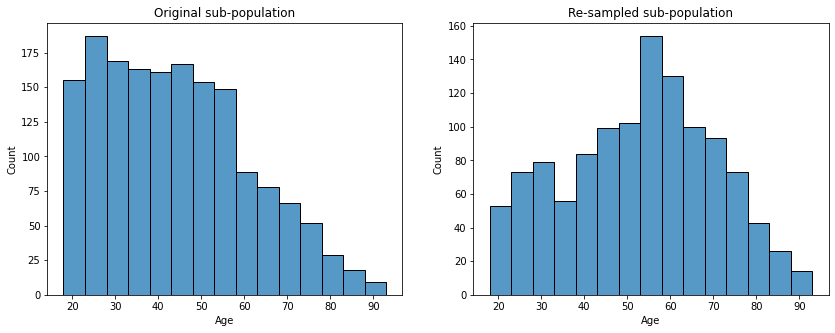

In [252]:
subpop = ('Cardiomegaly', 'Female', 'Non-Hispanic/Non-Latino')

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=A_orig_subpop_train[subpop], x='Age', binwidth=binwidth, ax=ax[0])
sns.histplot(data=A_selected_subpop_train[subpop], x='Age', binwidth=binwidth, ax=ax[1])

ax[0].set_title('Original sub-population')
ax[1].set_title('Re-sampled sub-population')

<AxesSubplot:xlabel='Age', ylabel='Count'>

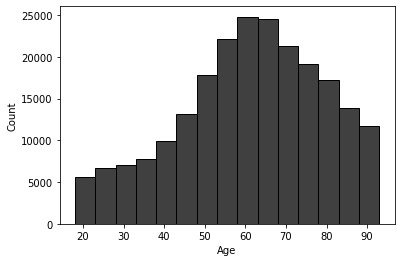

In [253]:
meta_df = pd.read_csv(os.path.join(root_path, 'train_demo_filt_patients.csv'), dtype={'Patient ID': str, 'Primary Race': object, 'Ethnicity': object})
sns.histplot(data=meta_df, x='Age', binwidth=binwidth, color='k', title='Original Age Distribution')

<AxesSubplot:xlabel='Age', ylabel='Count'>

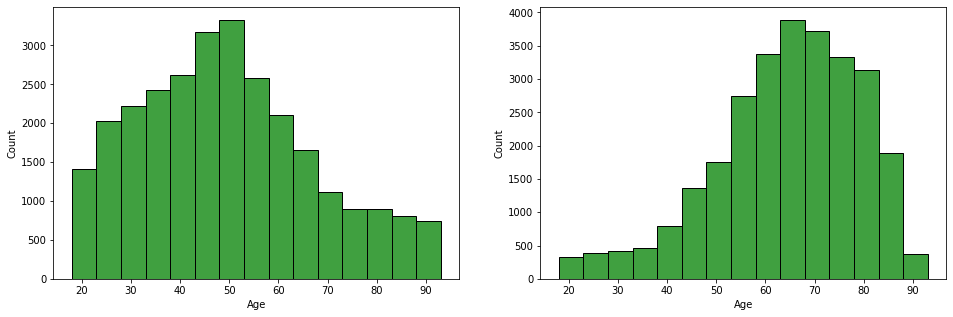

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=A_train, x='Age', binwidth=binwidth, color='g', ax=ax[0])
sns.histplot(data=B_train, x='Age', binwidth=binwidth, color='g', ax=ax[1])

ax[0].set_title('Domain A')
ax[1].set_title('Domain B')

# Simple Engineered Sampling

In [3]:
meta_df = pd.read_csv(os.path.join(root_path, 'train_demo_filt_patients.csv'), dtype={'Patient ID': str, 'Primary Race': object, 'Ethnicity': object})

In [5]:
n = 14000

female_df = meta_df[meta_df['Sex'] == 'Female']
result_F = female_df[female_df['Cardiomegaly'] == 1].sample(n=n, replace=True).append(
           female_df[female_df['No Finding'] == 1].sample(n=n, replace=True),
           ignore_index=True).reset_index(drop=True)
male_df = meta_df[meta_df['Sex'] == 'Male']
result_M = male_df[male_df['Cardiomegaly'] == 1].sample(n=n, replace=True).append(
           male_df[male_df['No Finding'] == 1].sample(n=n, replace=True),
           ignore_index=True).reset_index(drop=True)

In [6]:
result_F.to_parquet('sample_domain_F.parquet', index=False)
result_M.to_parquet('sample_domain_M.parquet', index=False)

# Organize data based on subset and condition

In [79]:
domains = ['A', 'B']
subsets = ['train', 'test']
conditions = ['Cardiomegaly', 'No Finding']

random_seed = 8

In [80]:
for domain in domains:
    for subset in subsets:
        save_path = {
            'Cardiomegaly': f'/shared/rsaas/nschiou2/CXR/data_demo/{subset}/chexpert_{domain}/x_car',
            'No Finding': f'/shared/rsaas/nschiou2/CXR/data_demo/{subset}/chexpert_{domain}/normal'
        }
        
        meta_df = pd.read_parquet(f'sample_domain_{domain}_{subset}.parquet')
        for condition in conditions:
            df = meta_df[meta_df[condition] == 1]
            df = df.reset_index(drop=True)
            df = df.sort_values('Patient ID', axis=0)
            
            idx = np.arange(len(df))
            # np.random.seed(random_seed)
            # np.random.shuffle(idx)
            
            os.makedirs(save_path[condition], exist_ok=True)

            if subset == 'train':
                selected_idx = idx[:10000]
            else:
                # selected_idx = idx[10000:14000]
                selected_idx = idx[:4000]

            for i in tqdm(selected_idx, desc=combo):
                patient_path = df.Path[i].split('/')
                patient_id = patient_path[2]

                img_save_name = f'chex_{condition}_{patient_id}_{i}.jpg'
                img_save_path = os.path.join(save_path[condition], img_save_name)

                im = Image.open(os.path.join('/shared/rsaas/nschiou2/CXR', df.Path[i]))
                im = im.resize((256, 256))
                im.save(img_save_path)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

### Get a sample image

In [37]:
os.listdir(os.path.join(root_path, subset, 'patient64462', 'study1'))

['view1_frontal.jpg']

In [38]:
im = Image.open(os.path.join(root_path, subset, 'patient09608', 'study1', 'view1_frontal.jpg'))
  
# Summarize some details about the image
print(im.format)
print(im.size)
print(im.mode)

JPEG
(390, 320)
L


Text(0.5, 1.0, 'Original Image')

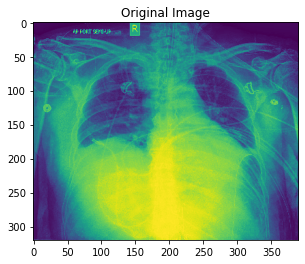

In [39]:
numpydata = np.asarray(im)
plt.imshow(numpydata)

plt.title('Original Image')

In [41]:
resized_im = im.resize((256, 256))

print(resized_im.size)

(256, 256)


Text(0.5, 1.0, 'Resized Image')

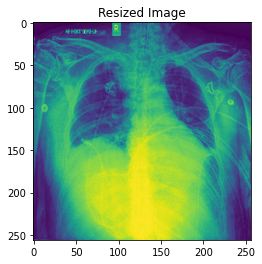

In [42]:
numpydata = np.asarray(resized_im)
plt.imshow(numpydata)

plt.title('Resized Image')